In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F # convolution function, pooling function, activation function, dropout function, loss function 등의 기능 제공
import torch.optim as optim #optimizer 제공
from torch import exp, sqrt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import math
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

----
# K-Means
군집의 개수를 정해줘야 함

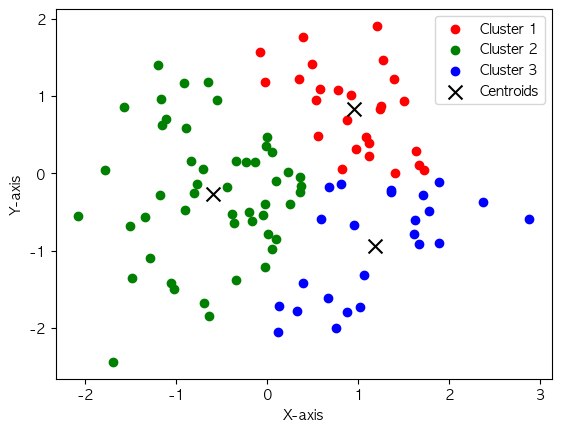

In [15]:
# Generate some random data points
data = torch.randn(100, 2)

# Number of clusters (K)
K = 3

# Initialize K cluster centroids randomly
centroids = data[random.sample(range(len(data)), K)]

# Number of iterations
num_iterations = 100

# K-Means algorithm
for _ in range(num_iterations):
    # Calculate distances between data points and centroids
    distances = torch.cdist(data, centroids)

    # Assign each data point to the nearest centroid
    cluster_assignment = torch.argmin(distances, dim=1)
    # print(cluster_assignment)

    # Update centroids by taking the mean of assigned data points
    for k in range(K):
        cluster_points = data[cluster_assignment == k]
        if len(cluster_points) > 0:
            centroids[k] = torch.mean(cluster_points, dim=0)

# Visualize the results
colors = ['r', 'g', 'b']
for k in range(K):
    cluster_points = data[cluster_assignment == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [16]:
print(centroids)

tensor([[ 0.9525,  0.8299],
        [-0.5993, -0.2717],
        [ 1.1873, -0.9381]])


----
# mean shift
클러스터 개수 지정을 안해줘도 된다 => 군집의 개수를 정해주지 않아도 됨

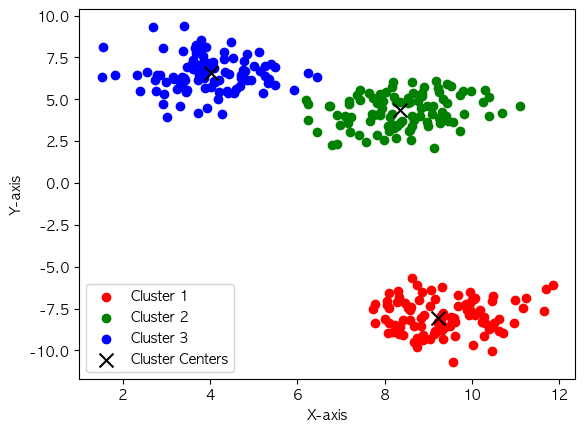

In [17]:
# Generate synthetic data with three clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0)

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X)) # 이게 중요함

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

# Get cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Number of clusters
n_clusters = len(np.unique(labels))

# Plot the data points and cluster centers
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='x', s=100, label='Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

AssertionError: Torch not compiled with CUDA enabled

/var/folders/wl/5h8ygnjj29ndbpccd4zxqbfh0000gn/T/ipykernel_5248/4031524178.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


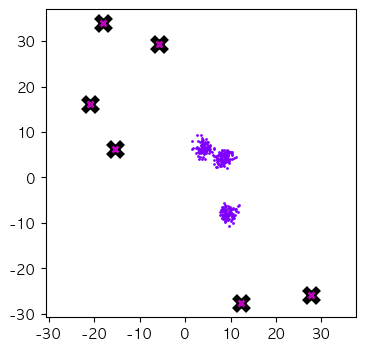

In [18]:
n_clusters = 6
n_samples = 1000

centroids = np.random.uniform(-35, 35, (n_clusters, 2))
slices = [np.random.multivariate_normal(centroids[i], np.diag([5., 5.]), n_samples)
          for i in range(n_clusters)]
data = np.concatenate(slices).astype(np.float32)

def distance(x, X): # 유클리디안 거리
    # return np.linalg.norm(x - X, axis=1)
    return sqrt(((x - X)**2).sum(1))

def gaussian(dist, bandwidth): # 밀도 구하기
    return exp(-0.5 * ((dist / bandwidth))**2) / (bandwidth * math.sqrt(2 * math.pi))

def meanshift_step(X, bandwidth=2.5):
    for i, x in enumerate(X):
        dist = distance(x, X)
        weight = gaussian(dist, bandwidth)
        X[i] = (weight[:, None] * X).sum(0) / weight.sum()
    return X

def meanshift_torch(X):
    X = torch.from_numpy(np.copy(X)).cuda()
    for it in range(5):
        X = meanshift_step(X)
    return X

def plot_data(centroids, data, n_samples):
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))

    fig, ax = plt.subplots(figsize=(4, 4))
    for i, centroid in enumerate(centroids):
        samples = data[i * n_samples : (i + 1) * n_samples]
        ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)
        ax.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
        ax.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)
    plt.axis('equal')
    
%time X = meanshift_torch(data).cpu().numpy()
plot_data(centroids+2, X, n_samples)


/var/folders/wl/5h8ygnjj29ndbpccd4zxqbfh0000gn/T/ipykernel_5248/4031524178.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


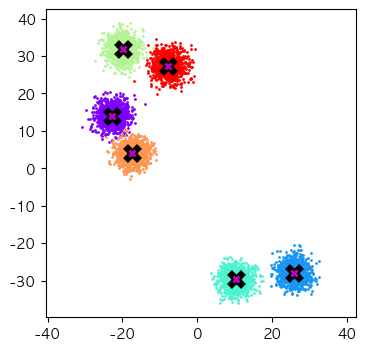

In [19]:
plot_data(centroids, data, n_samples)

/var/folders/wl/5h8ygnjj29ndbpccd4zxqbfh0000gn/T/ipykernel_5248/4031524178.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


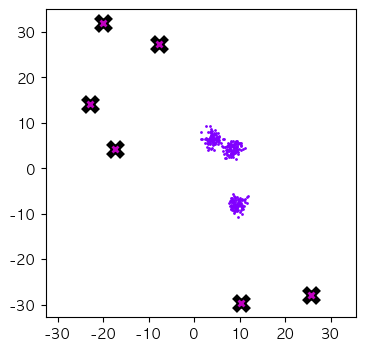

In [20]:

plot_data(centroids, X, n_samples)

----
# DBscan
군집의 개수를 정해주지 않아도 됨

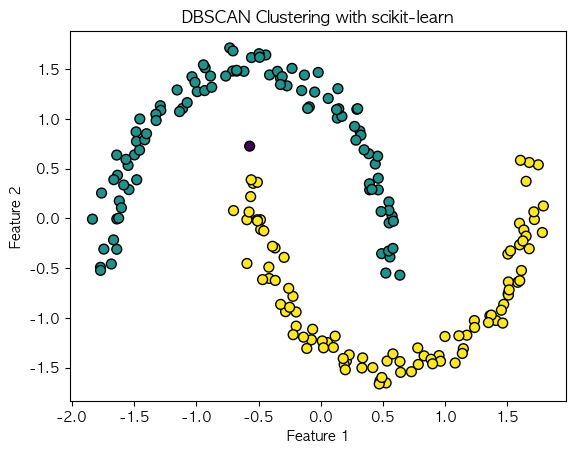

In [21]:
# Generate synthetic data (moon-shaped clusters)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
epsilon = 0.3
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



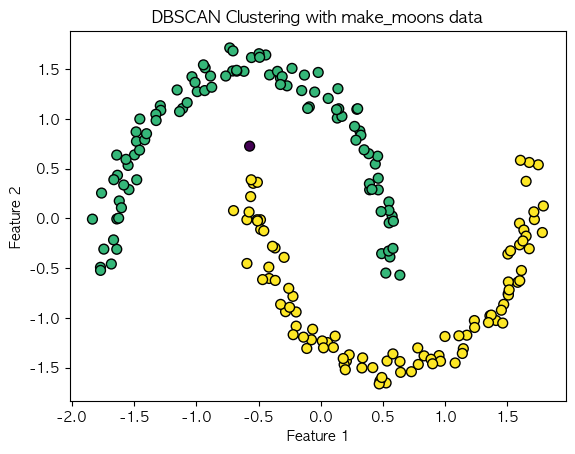

In [22]:
def euclidean_distance(x1, x2):
    return torch.sqrt(torch.sum((x1 - x2)**2))

def range_query(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_index], data[i]) < epsilon:
            neighbors.append(i)
    return torch.tensor(neighbors, dtype=torch.long)

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            new_neighbors = range_query(data, neighbor, epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors = torch.cat((neighbors, new_neighbors))
        i += 1

def dbscan(data, epsilon, min_samples):
    labels = torch.zeros(len(data), dtype=torch.long)
    cluster_id = 1
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        neighbors = range_query(data, i, epsilon)
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)
            cluster_id += 1

    return labels

# Example usage with make_moons data:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
data = torch.tensor(X, dtype=torch.float32)
# data = torch.rand((100, 2))

epsilon = 0.3 # 이거 설정을 잘 해야됨
min_samples = 5

cluster_labels = dbscan(data, epsilon, min_samples)
# print("cluster_labels", cluster_labels)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels.numpy(), cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering with make_moons data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

----
# 가오시안 믹스쳐 모델
군집의 개수를 정해줘야 함

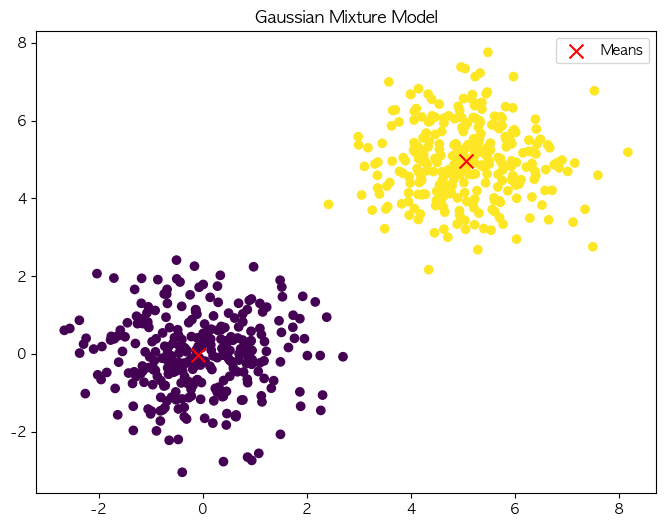

In [25]:
# 랜덤 데이터 생성
np.random.seed(0)
n_samples = 300
X = np.concatenate([1.0 * np.random.randn(n_samples, 2),
                    5 + 1.0 * np.random.randn(n_samples, 2)])

# GMM 모델 생성 및 학습
n_components = 2  # GMM의 구성 요소 수
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# 각 데이터 포인트가 속한 클러스터 확인
labels = gmm.predict(X)

# GMM의 평균 및 공분산 확인
means = gmm.means_
covariances = gmm.covariances_

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], color='red', marker='x', s=100, label='Means')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()


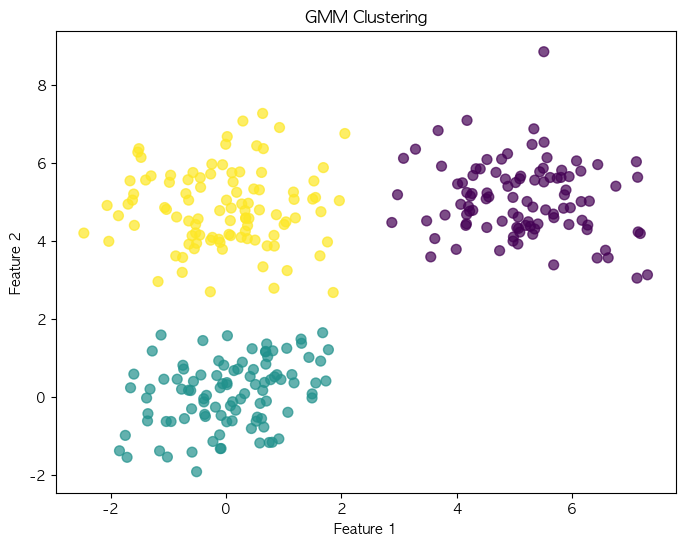

In [26]:
import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize parameters
        self.weights = np.full(self.n_components, 1 / self.n_components)
        self.means = X[np.random.choice(self.n_samples, self.n_components, replace=False)]
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_components)])

        log_likelihood = 0
        self.converged = False

        for i in range(self.max_iter):
            # E-step: Expectation
            responsibilities = self._expectation_step()

            # M-step: Maximization
            self._maximization_step(responsibilities)

            # Calculate log likelihood to check for convergence
            new_log_likelihood = self._calculate_log_likelihood()
            if np.abs(new_log_likelihood - log_likelihood) < self.tol:
                self.converged = True
                break

            log_likelihood = new_log_likelihood

    def _expectation_step(self):
        responsibilities = np.zeros((self.n_samples, self.n_components))
        for i in range(self.n_components):
            # Calculate PDF of each sample for each component
            component_pdf = multivariate_normal.pdf(self.X, self.means[i], self.covariances[i])
            responsibilities[:, i] = self.weights[i] * component_pdf

        # Normalize responsibilities
        responsibilities = responsibilities / responsibilities.sum(axis=1)[:, np.newaxis]
        return responsibilities

    def _maximization_step(self, responsibilities):
        for i in range(self.n_components):
            # Update weights
            total_responsibility = np.sum(responsibilities[:, i])
            self.weights[i] = total_responsibility / self.n_samples

            # Update means
            self.means[i] = np.sum(self.X * responsibilities[:, i][:, np.newaxis], axis=0) / total_responsibility

            # Update covariances
            self.covariances[i] = np.dot((responsibilities[:, i][:, np.newaxis] * (self.X - self.means[i])).T,
                                         (self.X - self.means[i])) / total_responsibility

    def _calculate_log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            component_pdf = multivariate_normal.pdf(self.X, self.means[i], self.covariances[i])
            log_likelihood += self.weights[i] * component_pdf
        return np.sum(np.log(log_likelihood))

    def predict(self, X):
        responsibilities = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            component_pdf = multivariate_normal.pdf(X, self.means[i], self.covariances[i])
            responsibilities[:, i] = self.weights[i] * component_pdf

        return np.argmax(responsibilities, axis=1)

# GMM class definition (same as provided earlier)

# Generating synthetic data
np.random.seed(42)
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [5, 5]
cov2 = [[1, 0], [0, 1]]
mean3 = [0, 5]
cov3 = [[1, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)
data3 = np.random.multivariate_normal(mean3, cov3, 100)

X = np.vstack([data1, data2, data3])

# Fit the GMM model
gmm = GMM(n_components=3)  # Example: using 3 clusters
gmm.fit(X)

# Make predictions
predicted_labels = gmm.predict(X)

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()